## Introduction

The purpose of this project is to explore data visualization techniques utilizing the Iris dataset. This kernal follows the “Python Data Visualization” kernel by Ben Hammer. This project seeks to reproduce, and to visually modify the given code.

## Setup
The following packages will need to be installed: pygal, pandas, seaborn, matplotlib
For windows owners, open terminal and install the following command:
Pip install “package name".

In [3]:
# Begin by importing pandas and seaborn, a data analysis tookit and graphing library, respectively. 

import pandas as pd

# To ignore warnings, use the following code to make the display more attractive.
# Import seaborn and matplotlib.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

#To import the Iris dataset:
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

#To view Iris data below:
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Samples from each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


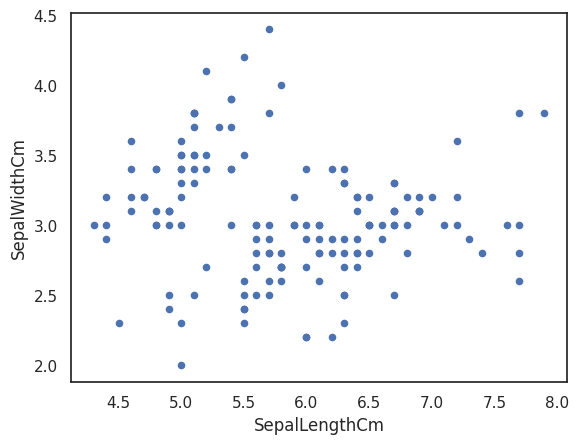

In [5]:
# The pandas plot extenstion can be used to make a scatterplot
# Display your plot with plt.show

iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

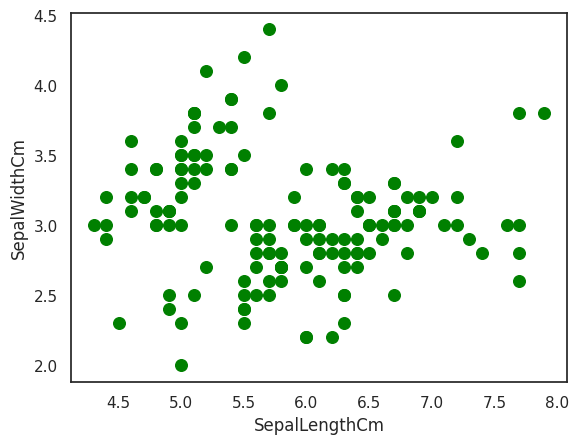

In [6]:
#To change color and size, add the following:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="green",s=70 )
plt.show()

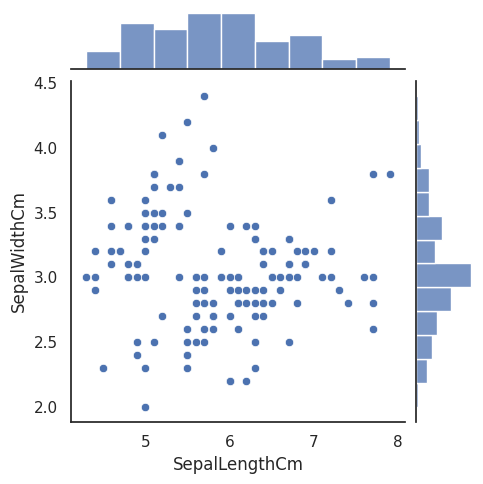

In [7]:
# Use seaborn jointplot, to make bivariate scatterplots and univariate histograms in one graph
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
plt.show()

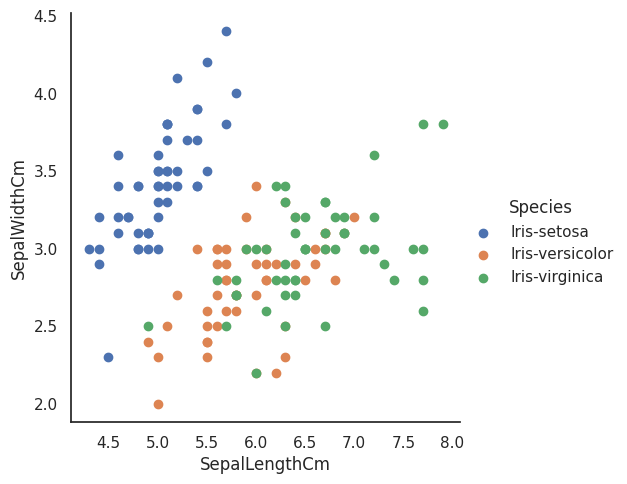

In [8]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

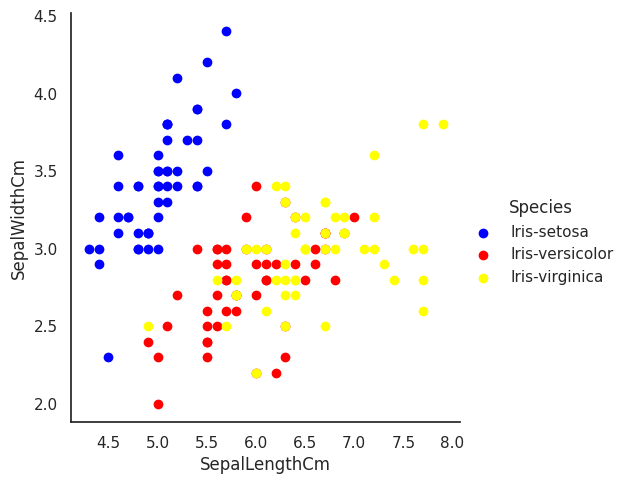

In [9]:
# Change the colors of the data points in the graph above
# Assign the colors a variable name, and insert hue_kws="variable name" as shown.
KS = {'color': ['blue', 'red', 'yellow']}
sns.FacetGrid(iris, hue_kws=KS, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

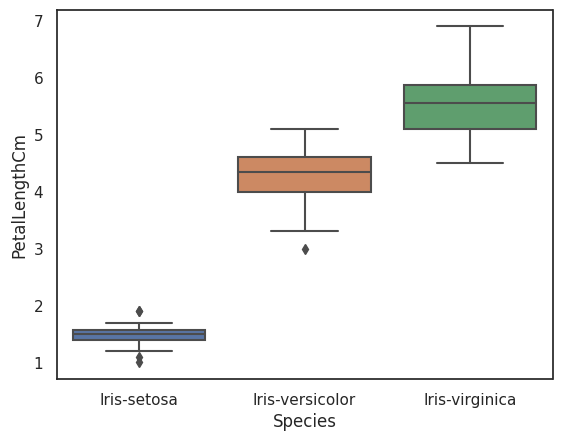

In [10]:
# To plot the species data using a box plot:

sns.boxplot(x="Species", y="PetalLengthCm", data=iris )
plt.show()

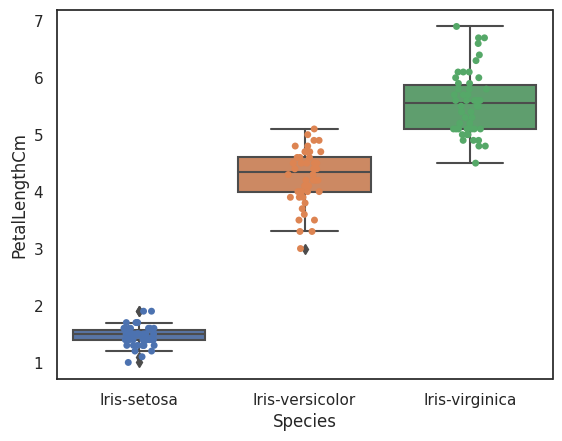

In [11]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.show()

IndexError: list index out of range

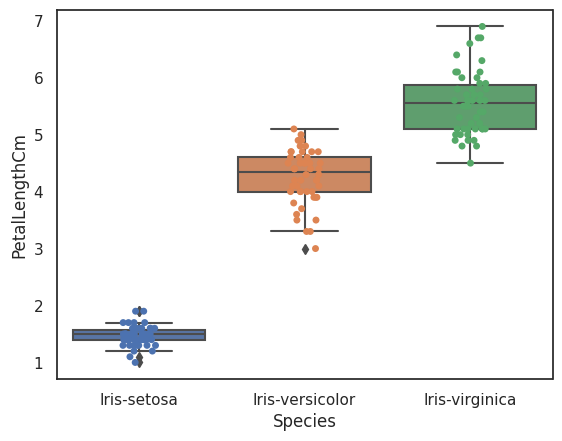

In [13]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

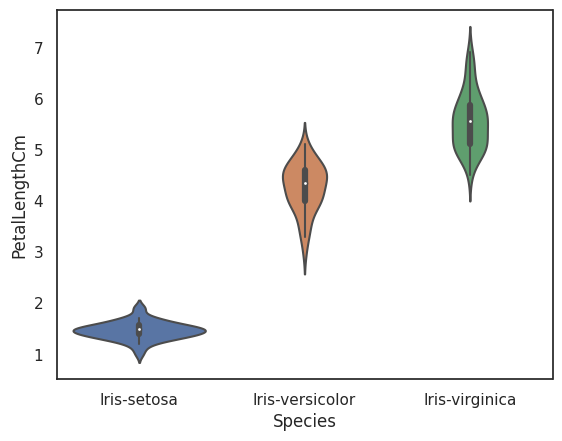

In [14]:
# A violin plot shows the density of the data, simularly to a scatter plot,
#and presents catagorical data like a box plot.
# Denser regions of the data are fatter.
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)
plt.show()

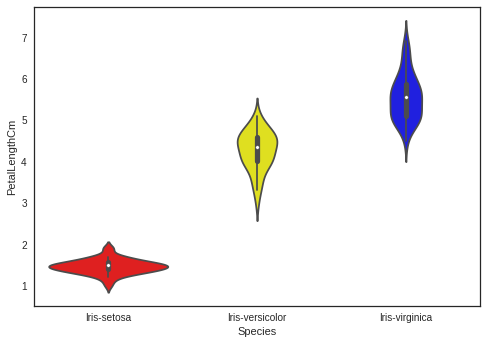

In [12]:
#To change the fill color of the violin, choose desired colors and set equal to pallete

sns.violinplot(x="Species", y="PetalLengthCm",  palette={"blue","red","yellow"}, data=iris, size=6)
plt.show()

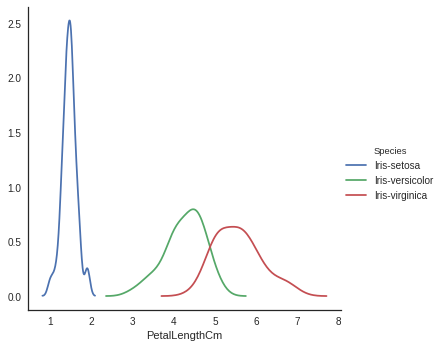

In [13]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.show()

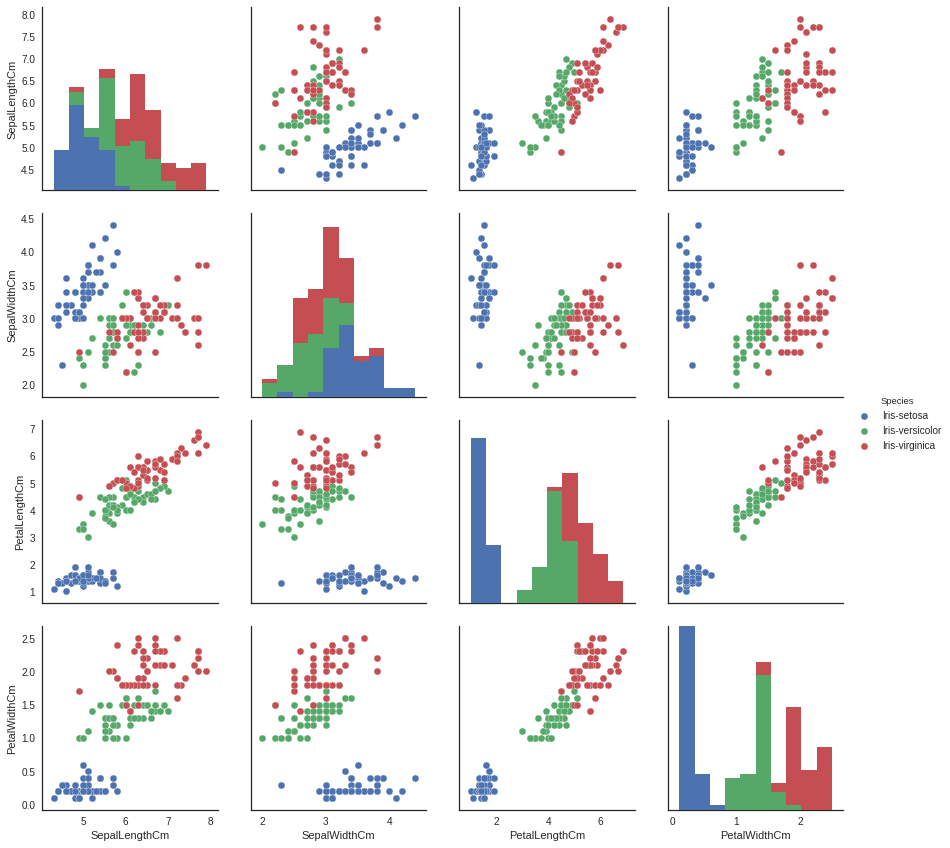

In [14]:

#Use pairplot to analyze the relationship between species for all characteristic combinations. 
# An observable trend shows a close relationship between two of the species

sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)
plt.show()


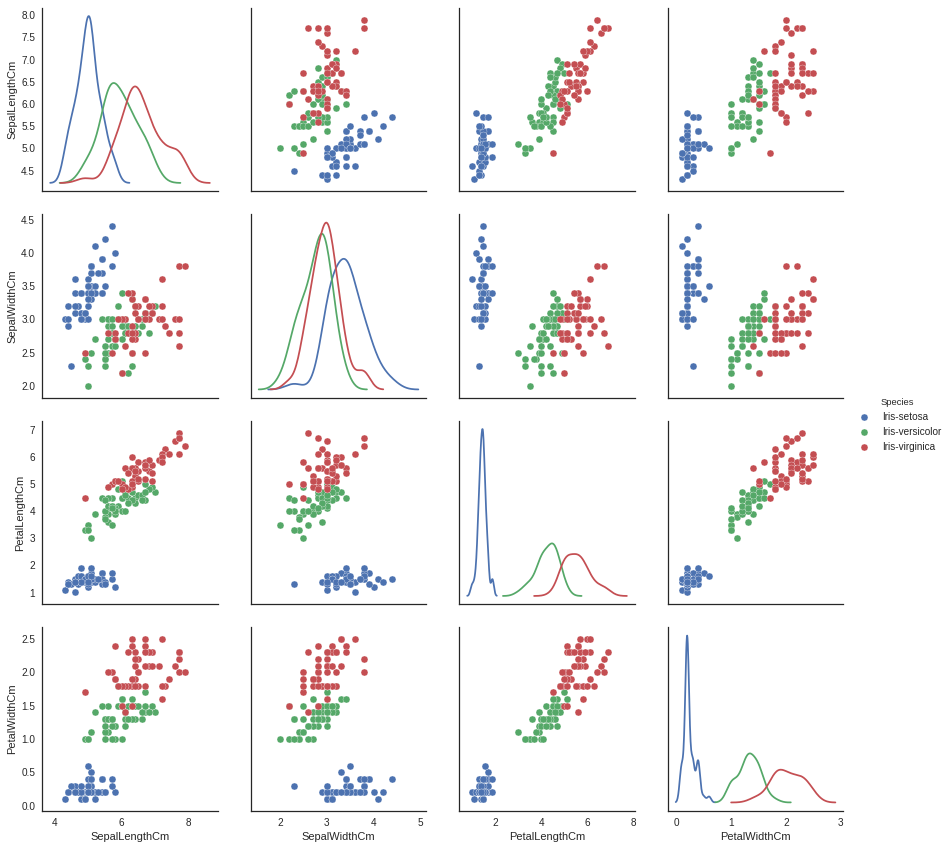

In [15]:
# Set diag_kind equal to kde to modify diagnal elements into showing kernal density estimation.

sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")
plt.show()

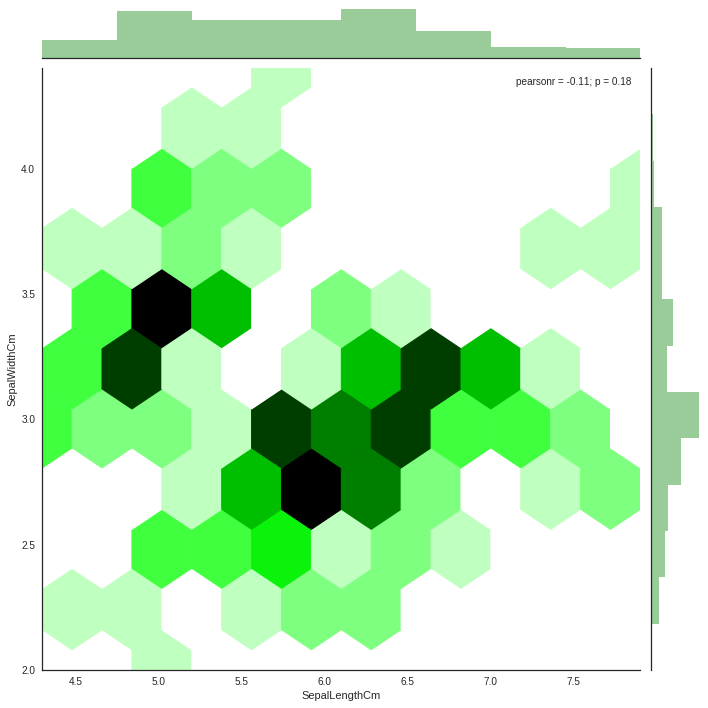

In [16]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=10,ratio=10, kind='hex',color='green')
plt.show()

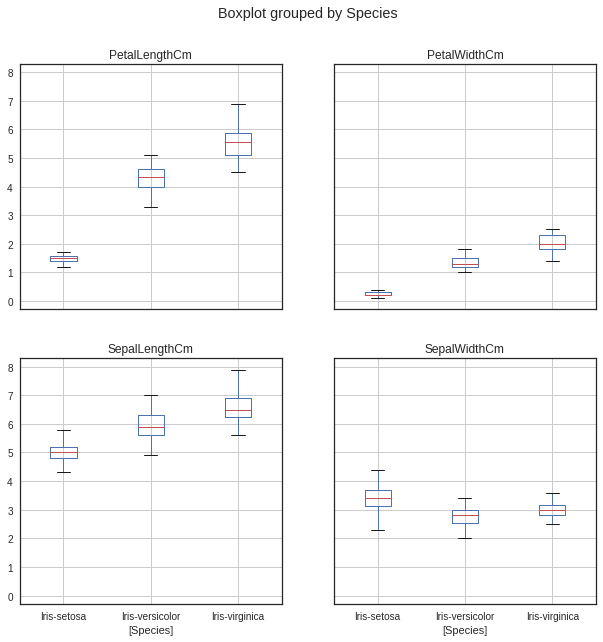

In [17]:
# To make a Pandas boxplot grouped by species, use .boxplot
#Modify the figsize, by placing a value in the X and Y cordinates
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(10, 10))
plt.show()


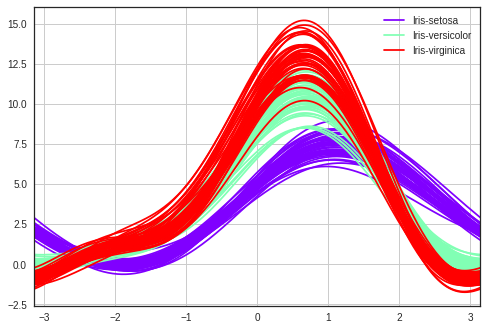

In [18]:
#In Pandas use Andrews Curves to plot and visualize data structure.
#Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
#This useful for detecting outliers in times series data.
#Use colormap to change the color of the curves

from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species",colormap='rainbow')
plt.show()

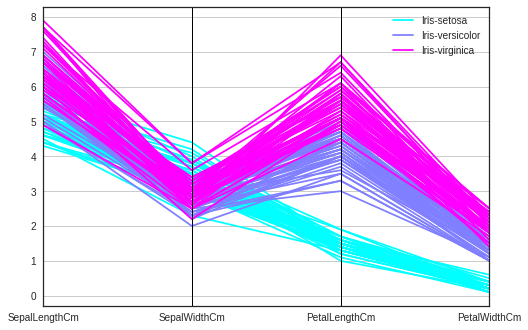

In [19]:
#Parallel_cordinates plot each feature on a seperate column.
#Each feature is then connected by lines, for each data sample
#Again, colormap can be used to choose an assortment of colors. 
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species",colormap='cool')
plt.show()

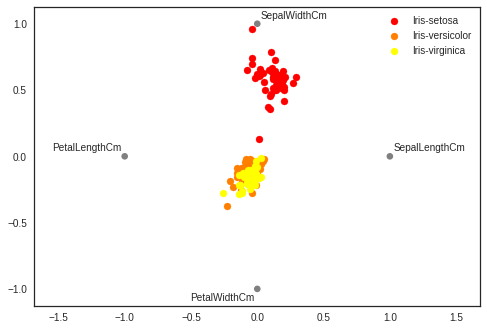

In [20]:
# Use Pandas' radviz to plot features on a 2D plane'
#Each sample is attached to each point using dimensional anchors,
#weighted by the relative value for that feature. 
#I also modified the colors in this representation
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species",colormap='autumn')
plt.show()

# Conclusion 

This kernal uses Python to apply data visualization tools to the Iris dataset. Color and size changes were made to the data points in scatterplots (*see* [6] and [9]). I changed the border and fill color of  the boxplot and violin, in [12] and  [14], respectively. Using colormap, I made color changes to Andrews curves [27], parallel cordinates [32], and radviz [33]. This kernal can be expanded by utilizing more tools to display the data, such as using line charts or a hexagonal bin plot.